# S-Bert Pipeline

In [5]:
from typing import List, Union, Tuple

import torch
from sentence_transformers import SentenceTransformer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from arqmath_code.Entities.Post import Question, Answer
from arqmath_code.topic_file_reader import Topic

## Simple S-Bert Pipeline

In [1]:
from src import init_data
topic_reader, data_reader = init_data(task=1)

reading users
reading comments
reading votes
reading post links
reading posts


In [7]:
from src.sbert.question_s_bert import QuestionSBERT
from src.post_processors.top_k_filter import TopKFilter
from arqmath_code.post_reader_record import DataReaderRecord
from src.base.pipeline import Pipeline
from src.post_processors.answer_score_retriever import AnswerScoreRetriever

class SBertPipeline(Pipeline):

    def __init__(self, data_reader: DataReaderRecord):
        super().__init__(data_reader)
        self.sbert = QuestionSBERT(model_id='all-MiniLM-L6-v2')
        self.answer_score_retriever = AnswerScoreRetriever()
        self.top_k_filter = TopKFilter()

    def run(self, queries: List[Topic]) -> List[Tuple[Topic, Answer, float]]:
        questions: List[Question] = self.data_reader.get_questions()
        ranking: List[
        Tuple[Topic, Union[Question, Answer], float]] = self.sbert(queries=queries, documents=questions)
        ranking = self.answer_score_retriever(queries=queries, ranking=ranking)
        ranking = self.top_k_filter(queries=queries, ranking=ranking)
        return ranking




In [9]:
from src.runner import Runner
from datetime import datetime

print(datetime.now())
runner = Runner(SBertPipeline, n=1, data_reader=data_reader, topic_reader=topic_reader)
ranking = runner.run("../results/model_results/SBert-test.tsv")
print(datetime.now())
ranking

2022-11-15 17:49:50.276118
read from cached embeddings at  ../arqmath_dataset/model_embeddings/document_embeddings_all-MiniLM-L6-v2.npy
2022-11-15 17:49:52.144842


,Topic_Id,Post_Id,Score,Run_Number,Rank
0,A.301,981,0.527293,0,0
1,A.301,3666,0.524437,0,1
2,A.301,1311280,0.515361,0,2
3,A.301,4122,0.490944,0,3
4,A.301,340,0.476349,0,4
...,...,...,...,...,...
99095,A.400,1029,-0.124593,0,986
99096,A.400,456,-0.128740,0,987
99097,A.400,1863,-0.129682,0,988
99098,A.400,413,-0.134927,0,989


## Plot embeddings for more examples

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
q_transformed = pd.DataFrame(pca.fit_transform(q_emb))
d_transformed = pd.DataFrame(pca.fit_transform(d_emb))
print(d_transformed)

              0         1
0     -0.064889 -0.043494
1     -0.045415  0.041631
2     -0.062295  0.007746
3     -0.195928  0.033659
4     -0.089345  0.146417
...         ...       ...
99995 -0.036558 -0.016462
99996 -0.140381  0.059406
99997 -0.237232 -0.008983
99998 -0.272687  0.178042
99999  0.176759  0.208574

[100000 rows x 2 columns]


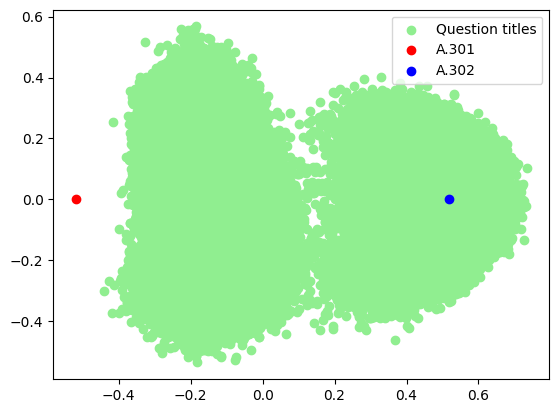

In [10]:
plt.scatter(d_transformed[0], d_transformed[1], label='Question titles', c='lightgreen')
plt.scatter(q_transformed.iloc[0][0], q_transformed.iloc[0][1], label='A.301', c='red')
plt.scatter(q_transformed.iloc[1][0], q_transformed.iloc[1][1], label='A.302', c='blue')
# plt.scatter(transformed.iloc[3][0], transformed.iloc[3][1], label='Class 4', c='lightblue')

plt.legend()
plt.show()

## check embedding loading

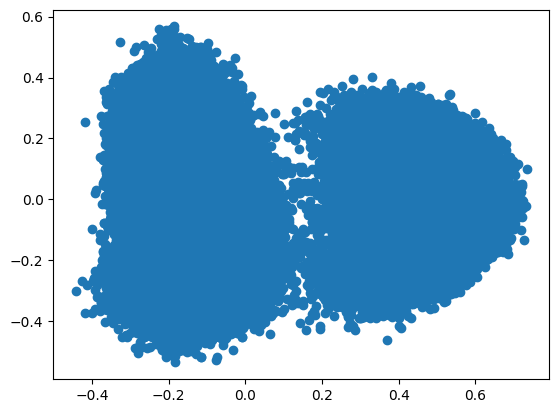

In [14]:
test = np.load('../arqmath_dataset/model_embeddings/test.npy')
test_transformed = pd.DataFrame(pca.fit_transform(test))
plt.scatter(test_transformed[0], test_transformed[1])
plt.show()